# Handwritten Digit Classification


For this Hands-on, we will use the popular scikit-learn library to build a basic classifier. The MNIST dataset contains images of handwritten digits, and the task is to classify each image into its corresponding digit (0 to 9).

## Import Libraries

In [29]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

## Load the Dataset

**Question 1:** Load the train and test subsets of the mnist dataset from Keras

In [30]:
import tensorflow as tf

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()



## Data Pre-Processing

**Question 2:**  

*   Adjust the input shape to match the one the model is expecting
*   Normalize the values of the pixels
*   Turn labels into categories using the to_categorical function

In [31]:
# Preprocess the data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## Build and train a CNN

**Question 3:** Create a Convolutional neural Network of your choice and be carefyl while you select the following:


*   input shape
*   activation function at the output layer
*   number of output neurons



In [32]:

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax'),
])






**Question 4:** Compile and train the model. Choose an appropriate loss function, optimizer, and print out the accuracy of the model.

In [34]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train, epochs=5, validation_split=0.2)


Epoch 1/5
1500/1500 [==============================] - 32s 21ms/step - loss: 0.1647 - accuracy: 0.9521 - val_loss: 0.0767 - val_accuracy: 0.9785
Epoch 2/5
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0563 - accuracy: 0.9822 - val_loss: 0.0628 - val_accuracy: 0.9822
Epoch 3/5
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0356 - accuracy: 0.9884 - val_loss: 0.0601 - val_accuracy: 0.9829
Epoch 4/5
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0239 - accuracy: 0.9920 - val_loss: 0.0561 - val_accuracy: 0.9854
Epoch 5/5
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0165 - accuracy: 0.9946 - val_loss: 0.0533 - val_accuracy: 0.9852


## Evaluate the Model's performance

In [35]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0120 - accuracy: 0.9961 - val_loss: 0.0624 - val_accuracy: 0.9838
Epoch 2/5
1500/1500 [==============================] - 31s 20ms/step - loss: 0.0084 - accuracy: 0.9975 - val_loss: 0.0746 - val_accuracy: 0.9843
Epoch 3/5
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0071 - accuracy: 0.9975 - val_loss: 0.0733 - val_accuracy: 0.9839
Epoch 4/5
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0067 - accuracy: 0.9977 - val_loss: 0.0673 - val_accuracy: 0.9852
Epoch 5/5
1500/1500 [==============================] - 31s 20ms/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.0782 - val_accuracy: 0.9841


**Question 5:** Plot the training and validation accuracy to better understand the performance of the model.

313/313 [==============================] - 2s 5ms/step - loss: 0.0523 - accuracy: 0.9865
Test Accuracy: 0.9865000247955322


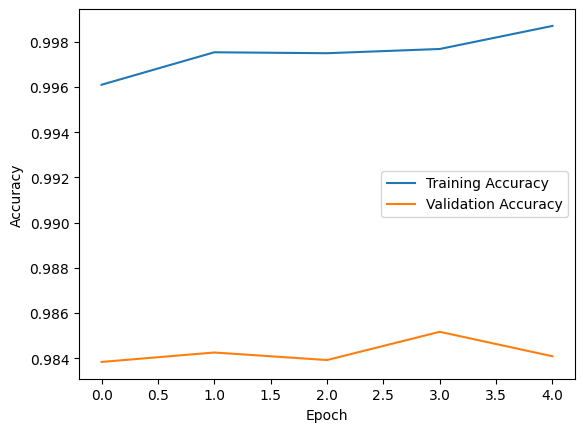

In [36]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

